<a href="https://colab.research.google.com/github/annchirackal/Tensorflow-Developer-Certification/blob/TF_certification_practice_CNN/10_CNN_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to Convolutional Nueral Networks and  Computer Vision with Tensorflow

Computer vision is the practice of  writing alogorithams which can discover patterns in visual data. For example, camera of self driving car recognizing car in front


### 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import zipfile
import os
import pathlib
import matplotlib.image as mpimg
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator




### 2. Get Data
Because convolutional neural networks work so well with images, to learn more about them, we're going to start with a dataset of images.

The images we're going to work with are from the Food-101 dataset, a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

🔑 Note: To prepare the data we're using, preprocessing steps such as, moving the images into different subset folders, have been done. To see these preprocessing steps check out the preprocessing notebook.

We'll download the pizza_steak subset .zip file and unzip it.

In [2]:
# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-12-18 03:57:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0b::cf, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   113MB/s    in 0.9s    

2023-12-18 03:57:47 (113 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
#Unizp the dowloaded file
zip_ref =zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


### 3. Understand the data

The best way to unserstand the data is to visualize the data points and the metadata . For a compurt vision project we can visualise multiple images from data

#### 3.1 Understand the folder structure

In [4]:
# we have uzipped the data set. Lets check the contents of the folder
!ls pizza_steak/

test  train


In [5]:
 !ls pizza_steak/train

pizza  steak


In [6]:
!ls pizza_steak/test

pizza  steak


In [7]:
## Lets use the walk funtion in os to understand more about the directory
for dirpath,dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are '{len(dirnames)}' directories and '{len(filenames)}' images in '{dirpath}'. ")

There are '2' directories and '0' images in 'pizza_steak'. 
There are '2' directories and '0' images in 'pizza_steak/test'. 
There are '0' directories and '250' images in 'pizza_steak/test/pizza'. 
There are '0' directories and '250' images in 'pizza_steak/test/steak'. 
There are '2' directories and '0' images in 'pizza_steak/train'. 
There are '0' directories and '750' images in 'pizza_steak/train/pizza'. 
There are '0' directories and '750' images in 'pizza_steak/train/steak'. 


In [8]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Dec 18 03:57 .
drwxr-xr-x 1 root root 4096 Dec 18 03:57 ..
drwxr-xr-x 4 root root 4096 Dec 18 03:57 test
drwxr-xr-x 4 root root 4096 Dec 18 03:57 train


#### 3.2 Visualize random image

In [9]:
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))# create a list of calss names from sub directories
class_names

array(['pizza', 'steak'], dtype='<U5')

In [10]:
# Lets visualise our images

def view_random_image(target_dir,target_class):
  #setup the target directory
  target_folder = target_dir+target_class


  #Get random image path
  random_image=random.sample(os.listdir(target_folder),1)

  # Read in mage and plot it using matplotlib

  img= mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape : {img.shape}") ## show the imag shape
  return img






Image shape : (384, 512, 3)


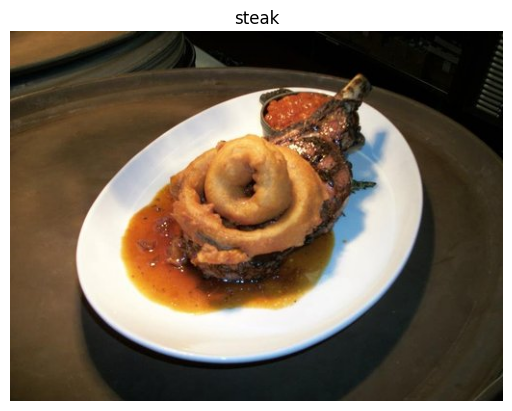

In [11]:
# View random image of steak  from training dataset
img=view_random_image("pizza_steak/train/","steak")

Image shape : (512, 512, 3)


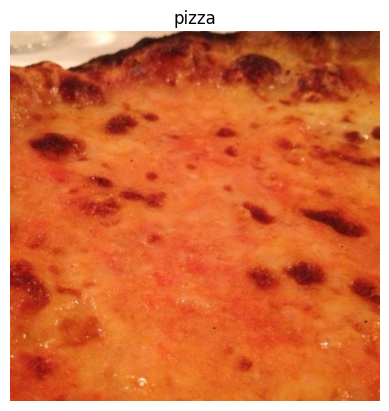

In [12]:
# View random image of steak  from training dataset
img=view_random_image("pizza_steak/train/","pizza")


In [13]:
img

array([[[241, 208, 173],
        [239, 206, 171],
        [237, 204, 169],
        ...,
        [109,  46,  15],
        [110,  47,  16],
        [117,  54,  23]],

       [[239, 206, 171],
        [238, 205, 170],
        [237, 204, 169],
        ...,
        [115,  52,  21],
        [116,  53,  22],
        [120,  57,  26]],

       [[235, 203, 165],
        [235, 203, 165],
        [235, 203, 165],
        ...,
        [122,  57,  29],
        [122,  57,  29],
        [122,  57,  29]],

       ...,

       [[209,  71,  32],
        [209,  71,  32],
        [209,  70,  31],
        ...,
        [196,  69,  24],
        [197,  70,  25],
        [199,  72,  27]],

       [[209,  72,  30],
        [208,  71,  29],
        [207,  70,  28],
        ...,
        [198,  71,  26],
        [197,  70,  25],
        [197,  70,  25]],

       [[200,  63,  21],
        [200,  63,  21],
        [201,  64,  22],
        ...,
        [201,  74,  29],
        [198,  71,  26],
        [196,  69,  24]]

### 3.4 Conclusions:
- Images have different shapes
- We have same number of samples from both pizza and steak

### 4 Data Preprocessing

- Load data and  Normalise/Scale data.
 -  Get all pixel values between 0 and 1

In [14]:
train_datagen=ImageDataGenerator(rescale=1./255)# Genearted barches of data wit realtime data Augmentation
valid_datagen=ImageDataGenerator(rescale=1./225)
#set up paths
train_dir="pizza_steak/train"
test_dir ="pizza_steak/test"
## Import data from directoryand turn it into batches
train_data=train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(224,224),class_mode='binary',seed=42)
valid_data=valid_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),class_mode='binary',seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


#### Bulid a CNN Model
-  same as tiny VGG in on CNN explainer websiteMM

In [15]:
from tensorflow.python.ops.gen_nn_ops import MaxPool
## Frist CNN model
cnn_model_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
#Compile the model

cnn_model_1.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )
history_1=cnn_model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 20s 170ms/step - loss: 0.6235 - accuracy: 0.6313 - val_loss: 0.4656 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 5s 115ms/step - loss: 0.4577 - accuracy: 0.7813 - val_loss: 0.3738 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 7s 142ms/step - loss: 0.3910 - accuracy: 0.8373 - val_loss: 0.3803 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 6s 121ms/step - loss: 0.3995 - accuracy: 0.8227 - val_loss: 0.3191 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 5s 115ms/step - loss: 0.3275 - accuracy: 0.8587 - val_loss: 0.3231 - val_accuracy: 0.8620


In [16]:
#Epoch 1/5
#47/47 [==============================] - 101s 2s/step - loss: 0.5456 - accuracy: 0.7140 - val_loss: 0.4230 - val_accuracy: 0.8080
#it took 101s to run the first epoch with cpu. So lets chage it to TPU : You can do by selecting runtime-->change run time-->TPU

In [17]:
#Model Summary
cnn_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

### CNN Architecure Explanation Detailed Notes :
https://poloclub.github.io/cnn-explainer/

##### Experimenting with one of the old work used for classification in previous notebooks on our current image classifiaction problem. This will help us to understand how CNN is different from a simple nueural network model

In [18]:
from keras.src.optimizers import optimizer
  #set random seed

tf.random.set_seed(42)


  ## model creation

nn_model_1= tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(224,224,3)), #( flatten the image in to a 2d array)

      tf.keras.layers.Dense(4,activation='relu'),
      tf.keras.layers.Dense(4,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid')
  ])

  #complie the model.

nn_model_1.compile(loss="binary_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])
history_1=nn_model_1.fit(train_data,
                           epochs=5,
                           steps_per_epoch=len(train_data),
                           validation_data=valid_data,
                           validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 124ms/step - loss: 0.8952 - accuracy: 0.4947 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 197ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 14s 303ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 129ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 12s 258ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


### Right now out model not working . Its just guessing the output. Lets update the model to see the performance imprive or not

In [19]:
nn_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Even though our nn model architecure is small compared to our cnn model we have lot more trainable parameters in nueral network model

In [20]:
## now lets try to improve above model by adding  more layers
nn_model_2= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')

])
nn_model_2.compile(loss='binary_crossentropy',
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=["accuracy"])
history_2=nn_model_2.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data=valid_data,
                         validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 107ms/step - loss: 3.5867 - accuracy: 0.6240 - val_loss: 0.5811 - val_accuracy: 0.7520
Epoch 2/5
47/47 [==============================] - 7s 139ms/step - loss: 0.9403 - accuracy: 0.6933 - val_loss: 0.4982 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 7s 147ms/step - loss: 0.6353 - accuracy: 0.7287 - val_loss: 1.2532 - val_accuracy: 0.5760
Epoch 4/5
47/47 [==============================] - 5s 107ms/step - loss: 0.5608 - accuracy: 0.7660 - val_loss: 0.4561 - val_accuracy: 0.7920
Epoch 5/5
47/47 [==============================] - 8s 168ms/step - loss: 0.6679 - accuracy: 0.7147 - val_loss: 0.4977 - val_accuracy: 0.8000


In [21]:
nn_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


from above model we could see that the nuber of parameters exponentially increase as we increase model complexity.
CNN helps to build simpler models for image processing


In [22]:
 ### lets create a baseline model
 cnn_model_2=tf.keras.Sequential(
     [
         tf.keras.layers.Conv2D(filters=10,
                kernel_size=3,
                strides=1,
                padding="valid",
                activation="relu",
                input_shape=(224,224,3),#ipnut layer(specify input shape here)
                ),
         tf.keras.layers.Conv2D(10,3,activation="relu"),
         tf.keras.layers.Conv2D(10,3,activation="relu"),
         tf.keras.layers.Flatten(),
         tf.keras.layers.Dense(1,activation='sigmoid')#output layers
     ]
 )

#### Lets deep dive into the hyperparameters of CONV2D layer
- Filters: Decides howmany filters should passover an input tensor(sliding window)
 - typical values of filters are 10,32,64,128. More filters means fore complex models
- Kernal size : Determines the shape of the filter( sliding window)
 - common values are (3,3) , (5,5)... small values learn small features (detailings in picture) . Larger values learn larger features.
 - A kernal or a fiter can be considered as a matrix and this matrix moves over each pixel and do dot product with the image. When the kernal has proper values it learns different features of the image.
- Padding : Pads the target tensor with zeros , if "same" is passed and this will help to maintain the shape of the tensor. On the other hand "vaild" compresses the imange.
-Strides : number of steps an image takes over an image. Stride=1 means filter moves by one pixel at a time


In [23]:
### compile the model
cnn_model_2.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]

)

In [24]:
## get model summary
cnn_model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
cnn_2_history=cnn_model_2.fit(train_data,
                epochs=5,
                steps_per_epoch=len(train_data),
                validation_data=valid_data,
                validation_steps=len(valid_data)
                )

Epoch 1/5
47/47 [==============================] - 6s 136ms/step - loss: 0.0441 - accuracy: 0.9920 - val_loss: 0.5463 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 7s 139ms/step - loss: 0.0178 - accuracy: 0.9993 - val_loss: 0.5551 - val_accuracy: 0.7840
Epoch 3/5
47/47 [==============================] - 7s 148ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.5505 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 5s 115ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.5710 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 7s 144ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.6192 - val_accuracy: 0.7920


In [ ]:
### Accuracy Plots


